In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/priject1/lab8/Iris.csv")

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']

X = df.drop("Species", axis=1)
X = X.drop("Id", axis=1)
y = df["Species"]

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [7]:
X = pd.DataFrame(X_std, columns = X.columns)

In [8]:
print("Correlation Matrix: ")
X.corr()

Correlation Matrix: 


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components =4)
pca = pca.fit(X)
pca

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [10]:
print("Data Variance: ")
pca.explained_variance_ratio_

Data Variance: 


array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

In [11]:
print("Eigen values:", pca.explained_variance_)

Eigen values: [2.93035378 0.92740362 0.14834223 0.02074601]


In [12]:
print("Eigen vectors:", pca.components_)

Eigen vectors: [[ 0.52237162 -0.26335492  0.58125401  0.56561105]
 [ 0.37231836  0.92555649  0.02109478  0.06541577]
 [-0.72101681  0.24203288  0.14089226  0.6338014 ]
 [-0.26199559  0.12413481  0.80115427 -0.52354627]]


In [13]:
print("Correlation Matrix: ")
X.corr()

Correlation Matrix: 


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


In [16]:
new_list = set(pca.components_[0])
new_list.remove(max(new_list))
print("The selected features are:")
for i in range(len(pca.components_[0])):
  if pca.components_[0][i] == max(pca.components_[0]):
    print(X.columns[i])
for i in range(len(pca.components_[0])):
  if pca.components_[0][i] == max(new_list):
    print(X.columns[i])

The selected features are:
PetalLengthCm
PetalWidthCm


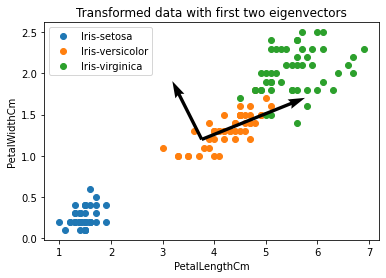

In [15]:
for key, group in df.groupby(['Species']):
    plt.plot(group['PetalLengthCm'], group['PetalWidthCm'],
               label=key, marker='o', linestyle='none')
    
m = np.array([df['PetalLengthCm'].mean(), 
              df['PetalWidthCm'].mean()])

plt.quiver([m[0]]*2, [m[1]]*2, pca.components_[:2,1], pca.components_[:2,0], zorder=11, width=0.01, scale=3)
    
plt.legend(loc=0, fontsize=10)
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.title('Transformed data with first two eigenvectors');